<a href="https://colab.research.google.com/github/digre5/Notebooks/blob/main/FirstNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic operations in Colaboratory notebook

---

[Colaboratory](https://research.google.com/colaboratory/faq.html) (or Colab) is a free research tool from Google for machine learning education and research built on top of [Jupyter Notebook](https://jupyter.org/). From our experience, it is also an ideal tool for scientific collaboration and sharing your results with non-experts (as opposed to, say, collaboration via a GitHub project), especially when there are drastic fluctuations in coding skills across a team/collaboration. This particular notebook starts with a brief overview of Colab's UI and then shows some simple operations in Colab notebooks, including some basic plotting, code parameterization, usage of shell commands and several examples of working with PyTorch deep machine learning library. Notice that many popular Python packages, such as tensorflow, pytorch, scikit, opencv, are already installed in Colaboratory. So we can just import them into our notebook and start having fun.

---



##Notebook rules:

Some basic notebook rules:


1.   Click inside a cell with code and press SHIFT+ENTER (or click "PLAY" button) to execute it.
2.   Re-executing a cell will reset it (any input will be lost).
3.   Execute cells TOP TO BOTTOM.
4.  Use TAB for [code autocompletion and function parameters hint](https://colab.research.google.com/notebooks/basic_features_overview.ipynb#scrollTo=d4L9TOP9QSHn)
5. Notebooks are saved to your Google Drive (make sure to click on "COPY TO DRIVE" when opening a notebook shared with you).
6. Mount your Google Drive to have a direct access from a notebook to the files stored in the drive (this includes Team Drives).
7. If using Colab's virtual storage only, all the uploaded/stored files will get deleted when a runtime is recycled.

## Simple math with numpy and matplotlib

We can use "standard" python packages like [numpy](https://www.numpy.org/) and [matplotlib](https://matplotlib.org/) as well any many other popular packages for data manipulation and data vizualization, which are pre-installed in Colab .

In [ ]:
# Package for manipulation with numerical data
import numpy as np
# Package for plotting
import matplotlib.pyplot as plt

As an example, let's make a plot of *sin* and *cos* waves using numpy and matplotlib.

First, define *'x'* and *'y'*:

In [ ]:
# creates array of data points between 0 and 10, with 0.01 interval
x = np.arange(0, 10, 0.01)
# calculates sin function at each point
y_sin = np.sin(x)
# calculates cos function at each point
y_cos = np.cos(x)

Now plot sine and cosine waves:

Text(0.5, 0, 'x (rad)')

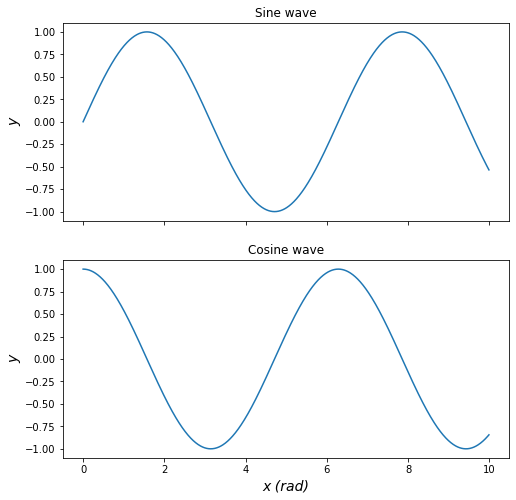

In [ ]:
# creates a figure and a set of subplots (ax1 and ax2)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 8))
# plot sine wave in the first subplot
ax1.plot(x, y_sin)
ax1.set_title('Sine wave')
ax1.set_ylabel('y', fontsize=14, style='italic')
# plot cosine wave in the second subplot
ax2.plot(x, y_cos)
ax2.set_title('Cosine wave')
ax2.set_ylabel('y', fontsize=14, style='italic')
# this axis is shared by two subplots
ax2.set_xlabel('x (rad)', fontsize=14, style='italic')

## Forms

You can use forms to parameterize your code. To add a form, use *Insert --> Add form field*.  Everytime you change the value in a form, the corresponding value in the code cell will adjust accordingly. Press SHIFT+ENTER or "PLAY" button on the left side to run the cell. In the example below we can adjust $a$ and $b$ parameters for $y = a sin(bx)$ function, level of noise and a figure size:

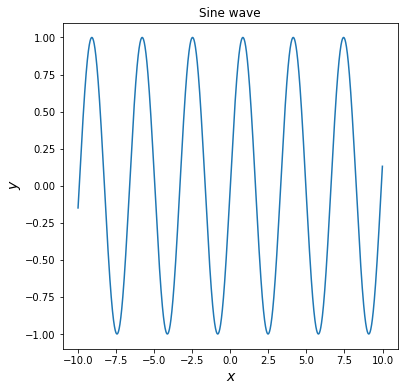

In [ ]:
#@title _y=asin(bx+c)_ parameters, noise level and figure size
a = 1 #@param {type:"slider", min:0.5, max:5, step:0.1}
b = 1.9 #@param {type:"slider", min:0.5, max:5, step:0.1}
c = 0 #@param {type: "slider", min:0, max:5, step:0.1}
noise = 0 #@param {type:"slider", min:0, max:1, step:0.1}
fig_size = 6 #@param {type:"slider", min:4, max:10, step:1}

x = np.arange(-10, 10, 0.01)
y_sin = a*np.sin(b*x) + c + noise*np.random.normal(size=x.shape)
plt.figure(figsize=(fig_size, fig_size))
plt.plot(x, y_sin)
plt.xlabel('x', fontsize=14, style='italic')
plt.ylabel('y', fontsize=14, style='italic')
plt.title('Sine wave')
plt.show()

Notice that you can also hide the entire code field (*More cell actions --> Form --> Hide code*).

## Simple regression with PyTorch

Neural networks are [universal function approximator](https://en.wikipedia.org/wiki/Universal_approximation_theorem). To illustrate it here we will generate data points using a *sin* function, corrupt the produced data by random noise and then will "fit" the target distribution with a neural network. The data will be generated with PyTorch instead of numpy module (but notice many similarities):

In [ ]:
import torch
torch.manual_seed(42)
x = torch.unsqueeze(torch.arange(-10, 10, 0.01), dim=1)
y = torch.sin(x) + 0.2*torch.randn(x.size())

Plot the generated data:

Text(0, 0.5, 'y')

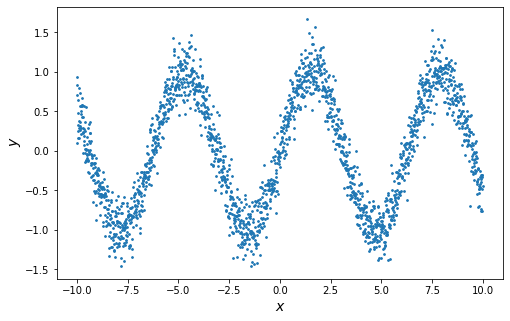

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(x, y, s=3)
ax.set_xlabel('x', fontsize=14, style='italic')
ax.set_ylabel('y', fontsize=14, style='italic')

We now constuct a simple neural network to fit the data distribution. Our neural network has just two [fully-connected layers](https://en.wikipedia.org/wiki/Multilayer_perceptron), each with 100 neurons, activated by [leaky rectified linear unit function](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f). We then specify parameters for model training (weights optimizer and loss function/criterion) and move it to GPU device for faster computations.

Build a model:

In [ ]:
# Construct model (Neural Network)
model = torch.nn.Sequential(
        torch.nn.Linear(in_features=1, out_features=100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(in_features=100, out_features=100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(in_features=100, out_features=1),
    )

Move our model together with the training data to GPU device

In [ ]:
model.cuda()
x = x.cuda()
y = y.cuda()

Specify optimizer and loss function for neural network training:

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9) # stochastic gradient descent
criterion = torch.nn.MSELoss() # mean-squared loss

Finally, we train our simple model:

(this shouldn't take more than one minute)

In [ ]:
EPOCHS = 20000
for e in range(EPOCHS):
    # clear gradients
    optimizer.zero_grad()
    # propagate variable x through a network and get model's prediction
    y_predicted = model(x)
    # compare predicted value with true value and calculate mean squared error
    loss = criterion(y_predicted, y)
    # do backpropagation to compute gradients
    loss.backward()
    # optimize weights
    optimizer.step()
    # print statistics
    if e % 100 == 0:
        print('Epoch: {}  Loss: {}'.format(e, loss.item()))

Transfer data back to CPU and convert it to numpy for plotting:

In [ ]:
x_to_plot = x.cpu().numpy()
y_to_plot = y.cpu().numpy()
y_predicted_to_plot = y_predicted.cpu().data.numpy()

Plot results:

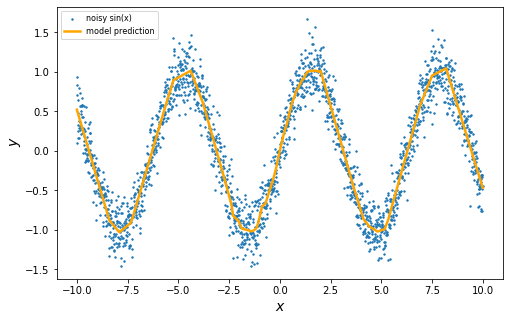

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(x_to_plot, y_to_plot, s=2, label='noisy sin(x)')
ax.plot(x_to_plot, y_predicted_to_plot, c='orange', linewidth=2.5, label='model prediction')
ax.set_xlabel('x', fontsize=14, style='italic')
ax.set_ylabel('y', fontsize=14, style='italic')
ax.legend(loc='best', fontsize=8)

The result are actually pretty good. Notice that this type of neural network generally cannot capture long-range patterns in the data and is also not very good at generalization, which is why in the future we are going to use a network consisting of convolutional layers instead of classical "linear" layers as we did here.

Now let's see how good is our model at making predictions for new data points. First, transfer a model back to CPU:

In [ ]:
model = model.cpu()

Specify a value in radians for which you want to make a prediction:

In [ ]:
new_data_point = 1.575
print("Is this a new data point?", new_data_point not in x)
new_var = torch.Tensor([[new_data_point]])
print("Trained model predicton:", model(new_var).item())

Is this a new data point? True
Trained model predicton: 1.0121641159057617


This is quite close to a real sin(x) value for x=1.575